In [2]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
import datetime
from datetime import datetime

In [12]:
T = ['AAPL']
end = datetime(2019,12,24)
start = datetime(end.year - 2,end.month, end.day) #datetime( 2018, 9, 1)

for stock in T:
    globals()[stock] = web.DataReader(stock,'yahoo', start, end) # , start, end :weg für ganze daten 

In [13]:
df = web.DataReader(T,'yahoo', start, end)

In [14]:
df.shape

(503, 6)

/Users/joshuadenefleh/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

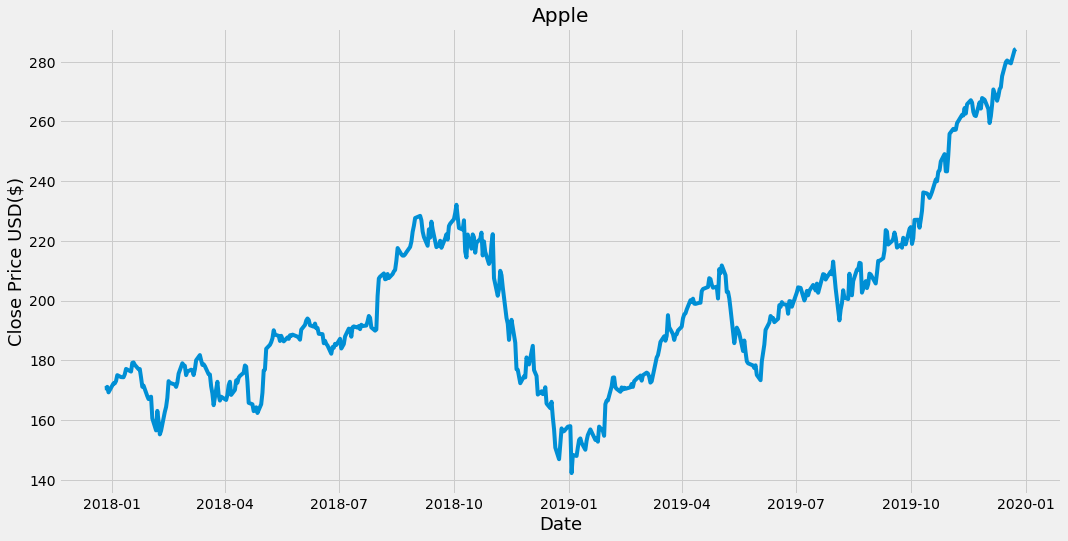

In [15]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)',fontsize = 18 )
plt.show

In [16]:
df = df['Close']

In [20]:
future_days = 25
df['Prediction']= df.shift(-future_days)
df.tail(4)

Symbols,AAPL,Prediction
Date,,
2019-12-19,280.019989,NaN
2019-12-20,279.440002,NaN
2019-12-23,284.000000,NaN
2019-12-24,284.269989,NaN


In [21]:
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[170.57000732]
 [170.6000061 ]
 [171.08000183]
 [169.22999573]
 [172.25999451]
 [172.22999573]
 [173.02999878]
 [175.        ]
 [174.3500061 ]
 [174.33000183]
 [174.28999329]
 [175.27999878]
 [177.08999634]
 [176.19000244]
 [179.1000061 ]
 [179.25999451]
 [178.46000671]
 [177.        ]
 [177.03999329]
 [174.22000122]
 [171.11000061]
 [171.50999451]
 [167.96000671]
 [166.97000122]
 [167.42999268]
 [167.77999878]
 [160.5       ]
 [156.49000549]
 [163.02999878]
 [159.53999329]
 [155.1499939 ]
 [156.41000366]
 [162.71000671]
 [164.33999634]
 [167.36999512]
 [172.99000549]
 [172.42999268]
 [171.8500061 ]
 [171.07000732]
 [172.5       ]
 [175.5       ]
 [178.97000122]
 [178.38999939]
 [178.11999512]
 [175.        ]
 [176.21000671]
 [176.82000732]
 [176.66999817]
 [175.02999878]
 [176.94000244]
 [179.97999573]
 [181.72000122]
 [179.97000122]
 [178.44000244]
 [178.6499939 ]
 [178.02000427]
 [175.30000305]
 [175.24000549]
 [171.27000427]
 [168.8500061 ]
 [164.94000244]
 [172.77000427]
 [168.33

In [24]:
y= np.array(df['Prediction'])[:-future_days]
#print(y)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [26]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)


In [28]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
#x_future

In [29]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[263.19000244 263.19000244 263.19000244 263.19000244 266.36999512
 264.29000854 265.57998657 267.25       264.16000366 259.45001221
 265.57998657 265.57998657 270.70999146 266.92001343 268.48001099
 270.76998901 271.45999146 275.1499939  279.85998535 280.41000366
 279.73999023 280.01998901 280.41000366 284.         284.26998901]

[236.62732943 235.75816071 236.5907255  237.62457001 241.37566265
 240.87247734 243.81845116 244.18442061 246.92912867 249.18893943
 243.91909101 243.89164505 248.92360983 255.38283454 256.91986436
 256.58135483 256.68198072 258.68561984 259.33522085 261.21991816
 261.00032253 263.29673721 261.62247758 264.4769695  265.70293575]


In [41]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

valid


/Users/joshuadenefleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Symbols,AAPL,Prediction,Predictions
Date,,,
2019-11-19,266.290009,NaN,263.190002
2019-11-20,263.190002,NaN,263.190002
2019-11-21,262.010010,NaN,263.190002
2019-11-22,261.779999,NaN,263.190002
2019-11-25,266.369995,NaN,266.369995
2019-11-26,264.290009,NaN,264.290009
2019-11-27,267.839996,NaN,265.579987
2019-11-29,267.250000,NaN,267.250000
2019-12-02,264.160004,NaN,264.160004


<function matplotlib.pyplot.show(*args, **kw)>

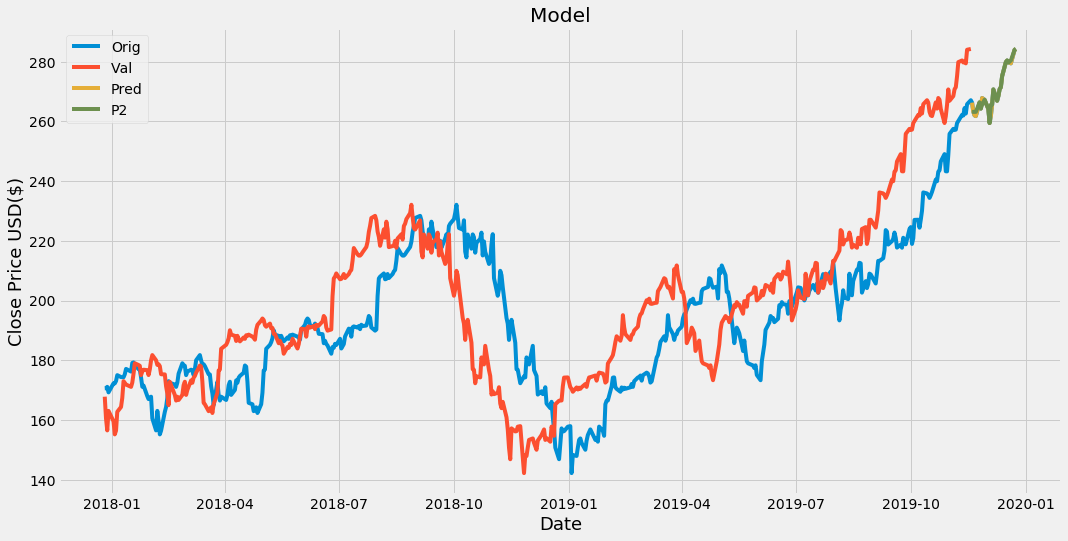

In [42]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)',fontsize = 18 )
plt.plot(df)
plt.plot(valid[['AAPL', 'Predictions']])
plt.legend(['Orig','Val','Pred','P2'])
plt.show

/Users/joshuadenefleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

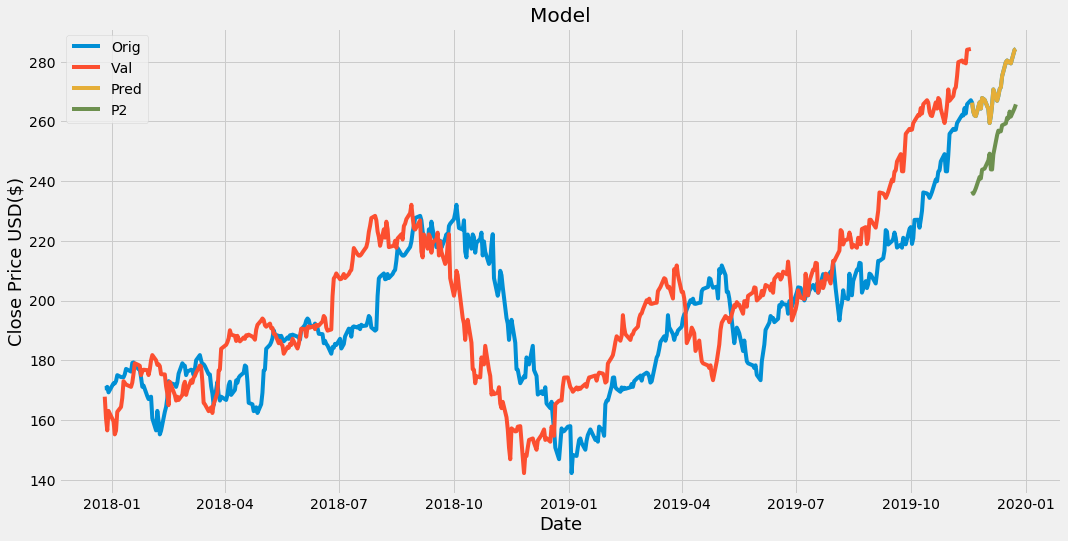

In [39]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions

valid


plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)',fontsize = 18 )
plt.plot(df)
plt.plot(valid[['AAPL', 'Predictions']])
plt.legend(['Orig','Val','Pred','P2'])
plt.show